# Capstone Project - Prediction of Car Accident Severity
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In the modern world, car accidents happen everyday and everywhere. Some accidents involve only minor or major property damages; however, others involve severe injuries or even fatalities. It is very important for all drivers to avoid accidents with high severity. This report aims to extract insights of accident data and predict accident severities based on several factors such as weather, light condition, location and so on.

The conclusion of insights will help drivers in the area make a correct judgement on the possibility of a severe accident involving injuries. It will also help drivers make a right decision if they should drive or not or if they should be more careful under certain conditions while driving. The targeted audience will be car drivers and traffic control department which routinely sends out traffic warnings and reminders.

## Data <a name="data"></a>

The datasets used by the report is from Seattle accident data which has 194673 samples with 37 attributes (the labeled 'SEVERITYCODE' has a duplicated column). The prediction will be 'SEVERITYCODE'. On examining the meaning of each feature among the 36 features, about 8 were selected as features for the modeling purpose. These features are 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ADDRTYPE' OR 'JUNCTIONTYPE', 'WEATHER', 'COLLISIONTYPE', 'PEDCOUNT', 'INCDTTM'. However, 'INCDTTM' will be translated into 'WEEKEND' and 'TIME'. So there will be 9 features for the model. Based on data visualization and analysis, some features may be dropped later for modeling.

### Import Data

In [84]:
import pandas as pd
import numpy as np

In [85]:
PATH = 'C:/Users/yyhu/Documents/IBM Certificate Study/Course 9/'
df = pd.read_csv(PATH + 'Data-Collisions.csv')
df.head()

C:\Users\yyhu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Data Conversion and Visualization

In [153]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['DAYOFWEEK'] = df['INCDTTM'].dt.dayofweek
df['TIMEOFDAY'] = df['INCDTTM'].dt.hour
# define time of day: Night, Morning, Afternoon and Evening 
df['TIMEOFDAY'] = df['TIMEOFDAY'].apply(lambda x: 'NIGHT' if (x<6) else ('MORNING' if (x<12) else ('AFTERNOON' if (x<18) else 'EVENING')))


Now let us take a look at the accident distributions during the time of day (**Night, Morning, Afternoon and Evening**)

In [158]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

df.groupby(['TIMEOFDAY'])['SEVERITYCODE'].value_counts(normalize=False)

TIMEOFDAY  SEVERITYCODE
AFTERNOON  1               45450
           2               21621
EVENING    1               26881
           2               11576
MORNING    1               28797
           2               12751
NIGHT      1               29705
           2               10974
Name: SEVERITYCODE, dtype: int64

In [159]:
df.groupby(['TIMEOFDAY'])['SEVERITYCODE'].value_counts(normalize=True)

TIMEOFDAY  SEVERITYCODE
AFTERNOON  1               0.677640
           2               0.322360
EVENING    1               0.698988
           2               0.301012
MORNING    1               0.693102
           2               0.306898
NIGHT      1               0.730229
           2               0.269771
Name: SEVERITYCODE, dtype: float64

Obviously, the number of accidents and their severities vary over the time of day. 'Afternoon' (or a value of 2) has the highest accidents and injuries (32%). It is justified to distinguish the time of day. Now let us take a look at other independent variables.  

In [89]:
df['ROADCOND'].isnull().value_counts()
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

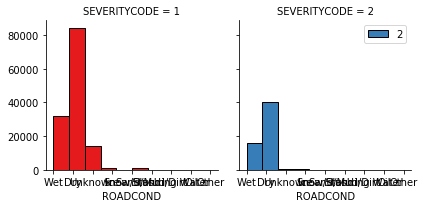

In [90]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ROADCOND', ec="k")
g.axes[-1].legend()
plt.show()

In [91]:
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

It surprisingly shows that road conditions don't affect accident severities a lot even though 'Wet' road has a slightly higher number of Severity 2 accidents (33% vs. 32% in 'Dry'). It is possible that drivers are aware of the wet road and drive more carefully.

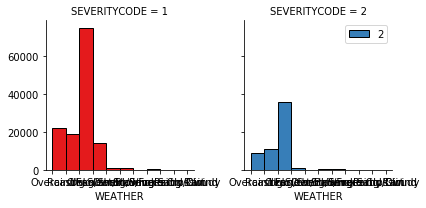

In [92]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'WEATHER', ec="k")
g.axes[-1].legend()
plt.show()

In [93]:
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

Again weather conditions don't affect accident severities a lot even though 'Raining' road has a slightly higher number of Severity 2 accidents (33.7% vs. 32.2% in 'Dry'). It is possible that drivers are aware of the bad weather and drive more carefully. Also the 'road condition' is highly correlated with 'weather condition).

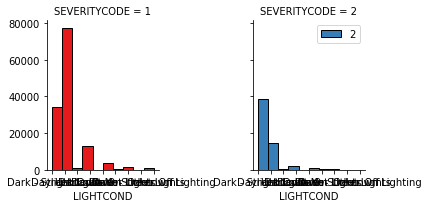

In [94]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'LIGHTCOND', ec="k")
g.axes[-1].legend()
plt.show()

In [125]:
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

As shown above, the light condition attribute presents some strange results. For 'daylight', the Severity 2 is higher (33% vs 30%) than that of 'dark', which is disturbing. Actually 'light condition' is highly correlated with the day of time attribute.

In [100]:
df['SPEEDING'] = df['SPEEDING'].apply(lambda x: 1 if (x=='Y') else 0)

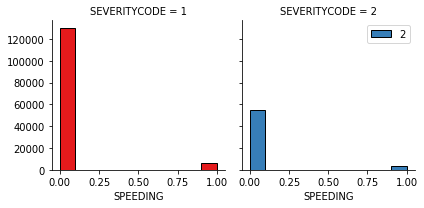

In [101]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'SPEEDING', ec="k")
g.axes[-1].legend()
plt.show()

In [103]:
df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True)

SPEEDING  SEVERITYCODE
0         1               0.705099
          2               0.294901
1         1               0.621665
          2               0.378335
Name: SEVERITYCODE, dtype: float64

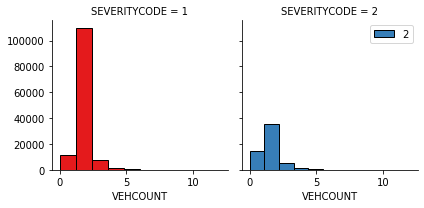

In [288]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'VEHCOUNT', ec="k")
g.axes[-1].legend()
plt.show()

In [289]:
df.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

VEHCOUNT  SEVERITYCODE
0         2               0.984694
          1               0.015306
1         2               0.549341
          1               0.450659
2         1               0.754532
          2               0.245468
3         1               0.579674
          2               0.420326
4         1               0.555969
          2               0.444031
5         1               0.506616
          2               0.493384
6         1               0.590278
          2               0.409722
7         1               0.521739
          2               0.478261
8         1               0.666667
          2               0.333333
9         2               0.666667
          1               0.333333
10        2               1.000000
11        1               0.500000
          2               0.500000
12        1               1.000000
Name: SEVERITYCODE, dtype: float64

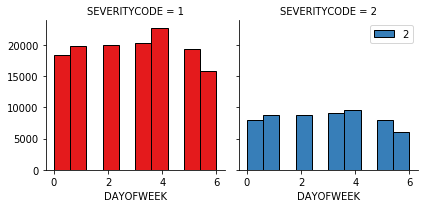

In [104]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'DAYOFWEEK', ec="k")
g.axes[-1].legend()
plt.show()

In [105]:
df.groupby(['DAYOFWEEK'])['SEVERITYCODE'].value_counts(normalize=True)

DAYOFWEEK  SEVERITYCODE
0          1               0.697281
           2               0.302719
1          1               0.694250
           2               0.305750
2          1               0.695705
           2               0.304295
3          1               0.692470
           2               0.307530
4          1               0.704358
           2               0.295642
5          1               0.706196
           2               0.293804
6          1               0.722022
           2               0.277978
Name: SEVERITYCODE, dtype: float64

In [107]:
df['WEEKEND'] = df['DAYOFWEEK'].apply(lambda x: 1 if (x>4)  else 0)

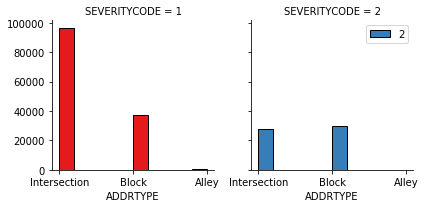

In [109]:
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADDRTYPE', ec="k")
g.axes[-1].legend()
plt.show()

In [115]:
df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

In [124]:
df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=False).sort_values(ascending=False)

COLLISIONTYPE  SEVERITYCODE
Parked Car     1               45325
Angles         1               21050
Rear Ended     1               19419
Other          1               17591
Sideswipe      1               16103
Rear Ended     2               14671
Angles         2               13624
Left Turn      1                8292
Other          2                6112
Pedestrian     2                5936
Left Turn      2                5411
Cycles         2                4744
Parked Car     2                2662
Sideswipe      2                2506
Right Turn     1                2347
Head On        1                1152
               2                 872
Pedestrian     1                 672
Cycles         1                 671
Right Turn     2                 609
Name: SEVERITYCODE, dtype: int64

In [122]:
df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True).sort_values(ascending=False)

COLLISIONTYPE  SEVERITYCODE
Parked Car     1               0.944527
Pedestrian     2               0.898305
Cycles         2               0.876085
Sideswipe      1               0.865334
Right Turn     1               0.793978
Other          1               0.742142
Angles         1               0.607083
Left Turn      1               0.605123
Rear Ended     1               0.569639
Head On        1               0.569170
               2               0.430830
Rear Ended     2               0.430361
Left Turn      2               0.394877
Angles         2               0.392917
Other          2               0.257858
Right Turn     2               0.206022
Sideswipe      2               0.134666
Cycles         1               0.123915
Pedestrian     1               0.101695
Parked Car     2               0.055473
Name: SEVERITYCODE, dtype: float64

### Feature Selection and Data Cleaning

I inspected the correlation of independent variables and found two pairs were highly correlated. They were the weather and road condition pair, time of day and light condition pair. From these highly correlated features, only one was kept, others were dropped from the dataset. After all, eight features were selected. They were **TIMEOFDAY, WEEKEND, SPEEDING, ADDRTYPE, COLLISIONTYPE, WEATHER, PERSONCOUNT and VEHCOUNT**. Next, let us clean up some rows of data with missing information.  

In [129]:
df['TIMEOFDAY'].isnull().value_counts()

False    194673
Name: TIMEOFDAY, dtype: int64

In [130]:
df['WEEKEND'].isnull().value_counts()

False    194673
Name: WEEKEND, dtype: int64

In [131]:
df['SPEEDING'].isnull().value_counts()

False    194673
Name: SPEEDING, dtype: int64

In [132]:
df['ADDRTYPE'].isnull().value_counts()

False    192747
True       1926
Name: ADDRTYPE, dtype: int64

In [136]:
df.dropna(subset=['ADDRTYPE'], axis=0, inplace=True)

In [138]:
df['COLLISIONTYPE'].isnull().value_counts()

False    187950
True       4797
Name: COLLISIONTYPE, dtype: int64

In [139]:
df.dropna(subset=['COLLISIONTYPE'], axis=0, inplace=True)

In [141]:
df['WEATHER'].isnull().value_counts()

False    187755
True        195
Name: WEATHER, dtype: int64

In [142]:
df.dropna(subset=['WEATHER'], axis=0, inplace=True)

In [249]:
df['PERSONCOUNT'].isnull().value_counts()

False    187755
Name: PERSONCOUNT, dtype: int64

In [250]:
df['VEHCOUNT'].isnull().value_counts()

False    187755
Name: VEHCOUNT, dtype: int64

In [143]:
df.shape

(187755, 41)

After dropping some rows with missing data, the total samples are reduced from 194673 to 187755. Now let us convert categorical variables to numeric and add some dummy features, so the dataset can be used for modeling.

In [163]:
df['WEATHER'] = df['WEATHER'].apply(lambda x: 1 if (x=='Clear') else 0) 

In [251]:
Feature =df[['WEEKEND','SPEEDING','WEATHER','PERSONCOUNT','VEHCOUNT']]

In [252]:
Feature = pd.concat([Feature,pd.get_dummies(df['TIMEOFDAY'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['ADDRTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)

In [253]:
Feature.head()

,WEEKEND,SPEEDING,WEATHER,PERSONCOUNT,VEHCOUNT,AFTERNOON,EVENING,MORNING,NIGHT,Alley,...,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,0,0,0,2,2,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,2,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,4,3,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,3,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,2,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [254]:
Feature.shape

(187755, 22)

### Data Normalization

In [256]:
from sklearn import preprocessing

X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.59, -0.23, -1.2 , -0.34,  0.05,  1.34, -0.51, -0.53, -0.53,
        -0.06, -1.39,  1.4 ,  2.1 , -0.17, -0.1 , -0.28, -0.38, -0.58,
        -0.19, -0.47, -0.13, -0.33],
       [-0.59, -0.23, -1.2 , -0.34,  0.05, -0.75,  1.97, -0.53, -0.53,
        -0.06,  0.72, -0.71, -0.48, -0.17, -0.1 , -0.28, -0.38, -0.58,
        -0.19, -0.47, -0.13,  3.03],
       [-0.59, -0.23, -1.2 ,  1.13,  1.84, -0.75, -0.51,  1.88, -0.53,
        -0.06,  0.72, -0.71, -0.48, -0.17, -0.1 , -0.28, -0.38,  1.74,
        -0.19, -0.47, -0.13, -0.33],
       [-0.59, -0.23,  0.84,  0.39,  1.84, -0.75, -0.51,  1.88, -0.53,
        -0.06,  0.72, -0.71, -0.48, -0.17, -0.1 , -0.28,  2.65, -0.58,
        -0.19, -0.47, -0.13, -0.33],
       [-0.59, -0.23, -1.2 , -0.34,  0.05, -0.75, -0.51,  1.88, -0.53,
        -0.06, -1.39,  1.4 ,  2.1 , -0.17, -0.1 , -0.28, -0.38, -0.58,
        -0.19, -0.47, -0.13, -0.33]])

In [257]:
# Convert the labeled variable to binary values(0 or 1)
y = df['SEVERITYCODE'] - 1
y.head()

0    1
1    0
2    0
3    0
4    1
Name: SEVERITYCODE, dtype: int64

## Methodology <a name="methodology"></a>

In this project I will direct my efforts on predicting the car accident severities in the Seattle area based on six actual features.

In the first step I have collected the required data and completed data cleaning. I have also selected features (based on the meaning of each feature and correlations).

In the second step I will select various classification algorithms for machine learning and compare their performances. Also I will complete exploratory data analysis to reveal how each feature contributes to the accident severity.

In the final step I will discuss the results and any potential improvements to the model.



## Analysis <a name="analysis"></a>

There are two categories (Severitycodes 1 and 2) for the accident severity (labeled output of the model). So this is a classification problem. In this project, I will investigate **Logistic Regression, K-Nearest Neighbor and Support Vector Machines algorithms** for machine learning.   

### Logistic Regression

In [176]:
import pylab as pl
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
%matplotlib inline 

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (131428, 22) (131428,)
Test set: (56327, 22) (56327,)


In [259]:
k_type = [0.001, 0.01, 0.1, 1]
mean_acc = np.zeros((4))
for n in range(0,4):
    
    #Train Model and Predict  
    LR = LogisticRegression(C=k_type[n], solver='liblinear').fit(X_train,y_train)
    yhat=LR.predict(X_test)
    mean_acc[n] = jaccard_similarity_score(y_test, yhat)

mean_acc

best_C = k_type[mean_acc.argmax()]
print( "The best accuracy was with", mean_acc.max(), "with a C of ", best_C)

LR = LogisticRegression(C=best_C, solver='liblinear').fit(X_train,y_train)
yhat=LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print("Jaccard score is", jaccard_similarity_score(y_test, yhat))
print("F1_score is", f1_score(y_test, yhat, average='weighted')) 
print("log loss is", log_loss(y_test, yhat_prob))

C:\Users\yyhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\yyhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\yyhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\yyhu\anaconda3\lib\site-package

The best accuracy was with 0.754913274273439 with a C of  0.1
Jaccard score is 0.754913274273439
F1_score is 0.7153661775131377
log loss is 0.48542678332384265


C:\Users\yyhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### K-Nearest Neighbor (KNN)

In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc



array([0.67665596, 0.71725815, 0.7098372 , 0.73085732, 0.71519875,
       0.73009392, 0.72324107, 0.73103485, 0.72228239])

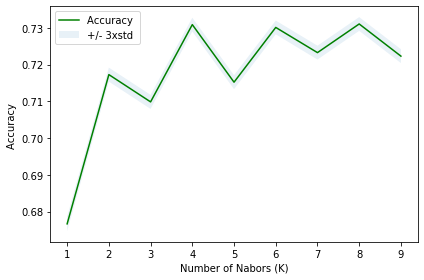

The best accuracy was with 0.7310348500719016 with k= 8


array([0, 0, 0, 0, 0], dtype=int64)

In [202]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
best_k = mean_acc.argmax()+1
print( "The best accuracy was with", mean_acc.max(), "with k=", best_k) 

#Train Model and Predict with best k 
neigh = KNeighborsClassifier(n_neighbors = best_k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

In [204]:
print("Jaccard score is", jaccard_similarity_score(y_test, yhat))
print("F1_score is", f1_score(y_test, yhat, average='weighted')) 

Jaccard score is 0.7310348500719016
F1_score is 0.705212634901096


### Support Vector Machines (SVM)

In [205]:
from sklearn import svm

mean_acc = np.zeros(4)
k_type = ['linear', 'poly', 'rbf', 'sigmoid']
for n in range(0,4):
    
    #Train Model and Predict  
    loanTree = svm.SVC(kernel=k_type[n]).fit(X_train,y_train)
    yhat=loanTree.predict(X_test)
    mean_acc[n] = jaccard_similarity_score(y_test, yhat)

mean_acc


C:\Users\yyhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\yyhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\yyhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\yyhu\anaconda3\lib\site-package

array([0.74779413, 0.74809594, 0.74827347, 0.64052763])

In [206]:
best_k = k_type[mean_acc.argmax()]
print( "The best accuracy was with", mean_acc.max(), "with method of ", best_k)

clf = svm.SVC(kernel=best_k).fit(X_train, y_train) 
yhat = clf.predict(X_test)
yhat [0:5]
print("Jaccard score is", jaccard_similarity_score(y_test, yhat))
print("F1_score is", f1_score(y_test, yhat, average='weighted')) 

The best accuracy was with 0.7482734745326398 with method of  rbf
Jaccard score is 0.7482734745326398
F1_score is 0.687204738444629


C:\Users\yyhu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Model Performance

Per jaccard index and f1-score for model accuracy, the logistic regression algorithm has the best overall accuracy (a jaccard index of 0.755 and a f1-score of 0.715). More importantly, training KNN and SVM models are much slower than the logistic regression model. So the **logistic regression model** is used for this project. Let us take a look at the confusion matrix of this model.

In [207]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [208]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.76      0.96      0.84     39286
           1       0.74      0.29      0.42     17041

    accuracy                           0.75     56327
   macro avg       0.75      0.62      0.63     56327
weighted avg       0.75      0.75      0.72     56327

Confusion matrix, without normalization
[[37588  1698]
 [12107  4934]]


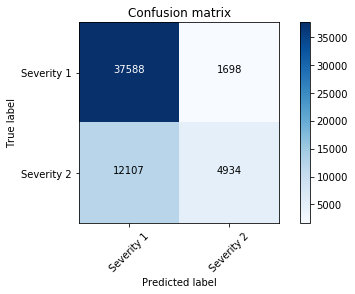

In [260]:
LR = LogisticRegression(C=best_C, solver='liblinear').fit(X_train,y_train)
yhat=LR.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity 1','Severity 2'],normalize= False,  title='Confusion matrix')

As shown by the confusion matrix, the recall and f1-score for Severity 2 accident are too low, which is not helpful for avoiding injuries. One of the reasons could be unbalanced labels in the training sets (91547 Severity 1 vs. 39881 Severity 2). Let us try to improve it by balancing the labels.

In [280]:
X = Feature
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
X_train['SEVERITYCODE'] = y_train

C:\Users\yyhu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [281]:
Xy_0 = X_train[X_train.SEVERITYCODE ==0].sample(39881)
Xy_1 = X_train[X_train.SEVERITYCODE ==1]
Xy = Xy_0.append(Xy_1)
Xy.shape

(79762, 23)

In [282]:
y1_train = Xy.loc[:,'SEVERITYCODE']
Xy.drop(columns='SEVERITYCODE', inplace=True)
X1_train = Xy

              precision    recall  f1-score   support

           0       0.89      0.56      0.69     39286
           1       0.45      0.84      0.59     17041

    accuracy                           0.64     56327
   macro avg       0.67      0.70      0.64     56327
weighted avg       0.76      0.64      0.66     56327

Confusion matrix, without normalization
[[21914 17372]
 [ 2694 14347]]


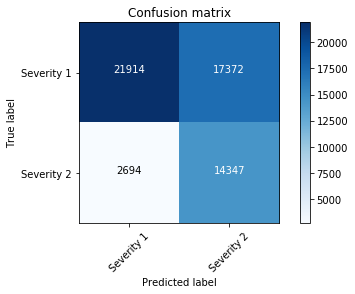

In [284]:
X1_train = preprocessing.StandardScaler().fit(X1_train).transform(X1_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
LR = LogisticRegression(C=best_C, solver='liblinear').fit(X1_train,y1_train)
yhat=LR.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity 1','Severity 2'],normalize= False,  title='Confusion matrix')

Apparently, the recall and f1-score of Severity 2 accidents have been greatly improved from 0.29 to 0.84 and 0.42 to 0.59, respectively. So balanced labels worked very well to improve the model.

## Results and Discussion <a name="results"></a>

In this study, I analyzed the relationship between car accident severities and a couple of factors such as weather conditions, time of day, locations and so on. I built classification models to predict the car accident severities. Among three models, the logistic regression model is the fastest and most accurate one. This model can be very useful in helping car drivers and traffic control department in a number of ways. For example, it could help drivers decide if they should drive or not today based on weather conditions, number of passengers and time of day or when is the better time to drive.

Weather and road conditions barely affected the labeled outputs because drivers were already aware of situations and drove more safely. But it doesn't mean people should ignore the bad weather and road conditions. It is well known that bad weather and road conditions can lead to more accidents if people ignore them. The traffic control department should still send out warnings and reminders when bad weather and road conditions exist. Most accidents including Severity 1 and Severity 2 happened in the afternoon when the traffic is usually heavy. Accidents due to speeding are more likely Severity 2. 

It is important to use balanced labels to train the model, otherwise, the recall of Severitiy 2 accidents will be too low and won't help drivers avoid injuries. 

## Conclusion <a name="conclusion"></a>

Purpose of this project was to predict car accident severities based on driving conditions including weather, road, time of day and so on. It is concluded that drivers should avoid speeding and driving in afternoon if possible to mitigate the risk of injuries. 